In [25]:
%load_ext autoreload
%autoreload 2
import os
import sys
import time
import numpy as np
from Shapley import ShapNN
from DShap import DShap
import matplotlib.pyplot as plt
import sklearn
from shap_utils import *
%matplotlib inline
MEM_DIR = './'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Let's have a calssification problem and use the a losigitic regression model for a small data set of size 100.

In [26]:
problem, model = 'classification', 'logistic'
hidden_units = [] # Empty list in the case of logistic regression.
train_size = 100

## Create Synthetic Dataset

Let's create a synthetic data set with input-output $y = Bernouli(f(x))$ where $f$ is a polynomial of oder 'difficulty' and $x \in \mathscr{R}^d$. ('important_dims' determines the number of $d$ dimensions in $x$ that are non-null)

In [27]:
d, difficulty = 50, 1
num_classes = 2
tol = 0.03
target_accuracy = 0.7
important_dims = 5
clf = return_model(model, solver='liblinear', hidden_units=tuple(hidden_units))
_param = 1.0
for _ in range(100):
    X_raw = np.random.multivariate_normal(mean=np.zeros(d), cov = np.eye(d), 
                                          size=train_size + 5000)
    _, y_raw, _, _ = label_generator(
        problem, X_raw, param = _param,  difficulty = difficulty, important=important_dims)
    clf.fit(X_raw[:train_size], y_raw[:train_size])
    test_acc = clf.score(X_raw[train_size:], y_raw[train_size:])
    if test_acc > target_accuracy:
        break
    _param *= 1.1
print('Performance using the whole training set = {0:.2f}'.format(test_acc))

Performance using the whole training set = 0.71


## Running

Now let's create the instance that takes cares of computing all the algorithms for the data set. Here we run it several times one-after-another, but in a real-world scenario they could be run in parallel. 

In [28]:
X, y = X_raw[:train_size], y_raw[:train_size]
X_test, y_test = X_raw[train_size:], y_raw[train_size:]
model = 'logistic'
problem = 'classification'
num_test = 1000
directory = './temp'
dshap = DShap(X, y, X_test, y_test, num_test, 
              sources=None, 
              sample_weight=None,
              model_family=model, 
              metric='accuracy',
              overwrite=True,
              directory=directory, seed=0)
dshap.run(100, 0.1, g_run=False)

Starting LOO score calculations!
LOO values calculated!
10 out of 100 TMC_Shapley iterations.
20 out of 100 TMC_Shapley iterations.
30 out of 100 TMC_Shapley iterations.
40 out of 100 TMC_Shapley iterations.
50 out of 100 TMC_Shapley iterations.
60 out of 100 TMC_Shapley iterations.
70 out of 100 TMC_Shapley iterations.
80 out of 100 TMC_Shapley iterations.
90 out of 100 TMC_Shapley iterations.
100 out of 100 TMC_Shapley iterations.
10 out of 100 TMC_Shapley iterations.
20 out of 100 TMC_Shapley iterations.
30 out of 100 TMC_Shapley iterations.
40 out of 100 TMC_Shapley iterations.
50 out of 100 TMC_Shapley iterations.
60 out of 100 TMC_Shapley iterations.
70 out of 100 TMC_Shapley iterations.
80 out of 100 TMC_Shapley iterations.
90 out of 100 TMC_Shapley iterations.
100 out of 100 TMC_Shapley iterations.
10 out of 100 TMC_Shapley iterations.
20 out of 100 TMC_Shapley iterations.
30 out of 100 TMC_Shapley iterations.
40 out of 100 TMC_Shapley iterations.
50 out of 100 TMC_Shapley iter

In [29]:
print(X.shape)
print(X_test.shape)

(100, 50)
(5000, 50)


In [30]:
X, y = X_raw[:100], y_raw[:100]
X_test, y_test = X_raw[100:], y_raw[100:]
model = 'logistic'
problem = 'classification'
num_test = 1000
directory = './temp'
dshap = DShap(X, y, X_test, y_test, num_test, 
              model_family=model, 
              metric='accuracy',
              directory=directory, 
              seed=1)
dshap.run(100, 0.1)

LOO values calculated!
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
10 out of 100 G-Shapley iterations
20 out of 100 G-Shapley iterations
30 out of 100 G-Shapley iterations
40 out of 100 G-Shapley iterations
50 out of 100 G-Shapley iterations
60 out of 100 G-Shapley iterations
70 out of 100 G-Shapley iterations
80 out of 100 G-Shapley iterations
90 out of 100 G-Shapley iterations
100 out of 100 G-Shapley iterations
10 out of 100 TMC_Shapley iterations.
20 out of 100 TMC_Shapley iterations.
30 out of 100 TMC_Shapley iterations.
40 out of 100 TMC_Shapley iterations.
50 out of 100 TMC_Shapley iterations.
60 out of 100 TMC_Shapley iterations.
70 out of 100 TMC_Shapley iterations.
80 out of 100 TMC_Shapley iterations.
90 out of 100 TMC_Shapley iterations.
100 out of 100 TMC_Shapley iterations.
10 out of 100 G-Shapley iterations
20 out of 100 G-Shapley iterations
30 out of 100 G-Shapley iterations
40 out of 100 G-Shapley i

In [31]:
X, y = X_raw[:100], y_raw[:100]
X_test, y_test = X_raw[100:], y_raw[100:]
model = 'logistic'
problem = 'classification'
num_test = 1000
directory = './temp'
dshap = DShap(X, y, X_test, y_test, num_test, 
              model_family=model, 
              metric='accuracy',
              directory=directory, 
              seed=2)
dshap.run(100, 0.1)

LOO values calculated!
10 out of 100 G-Shapley iterations
20 out of 100 G-Shapley iterations
30 out of 100 G-Shapley iterations
40 out of 100 G-Shapley iterations
50 out of 100 G-Shapley iterations
60 out of 100 G-Shapley iterations
70 out of 100 G-Shapley iterations
80 out of 100 G-Shapley iterations
90 out of 100 G-Shapley iterations
100 out of 100 G-Shapley iterations
10 out of 100 TMC_Shapley iterations.
20 out of 100 TMC_Shapley iterations.
30 out of 100 TMC_Shapley iterations.
40 out of 100 TMC_Shapley iterations.
50 out of 100 TMC_Shapley iterations.
60 out of 100 TMC_Shapley iterations.
70 out of 100 TMC_Shapley iterations.
80 out of 100 TMC_Shapley iterations.
90 out of 100 TMC_Shapley iterations.
100 out of 100 TMC_Shapley iterations.
10 out of 100 G-Shapley iterations
20 out of 100 G-Shapley iterations
30 out of 100 G-Shapley iterations
40 out of 100 G-Shapley iterations
50 out of 100 G-Shapley iterations
60 out of 100 G-Shapley iterations
70 out of 100 G-Shapley iterations


Now we merge results for the parallel runs:

In [32]:
dshap.merge_results()

./temp\mem_tmc_0000.pkl
./temp\mem_tmc_0001.pkl
./temp\mem_tmc_0002.pkl
./temp\mem_g_0000.pkl
./temp\mem_g_0001.pkl
./temp\mem_g_0002.pkl


Let's look at the convergence plots of the algorithms.

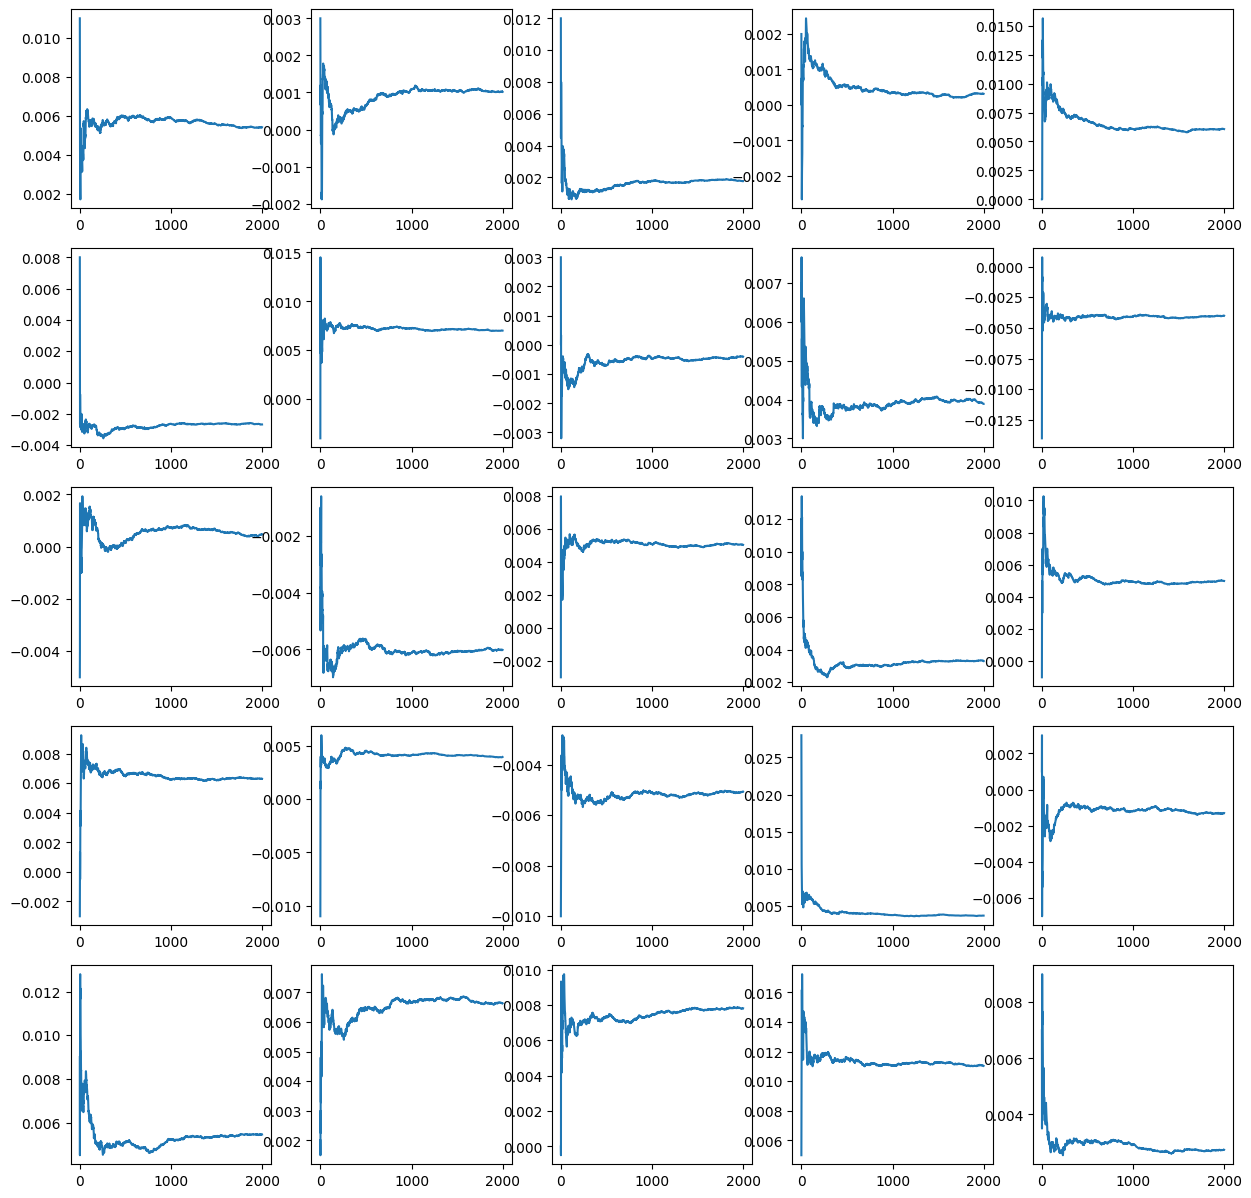

In [33]:
convergence_plots(dshap.marginals_tmc)

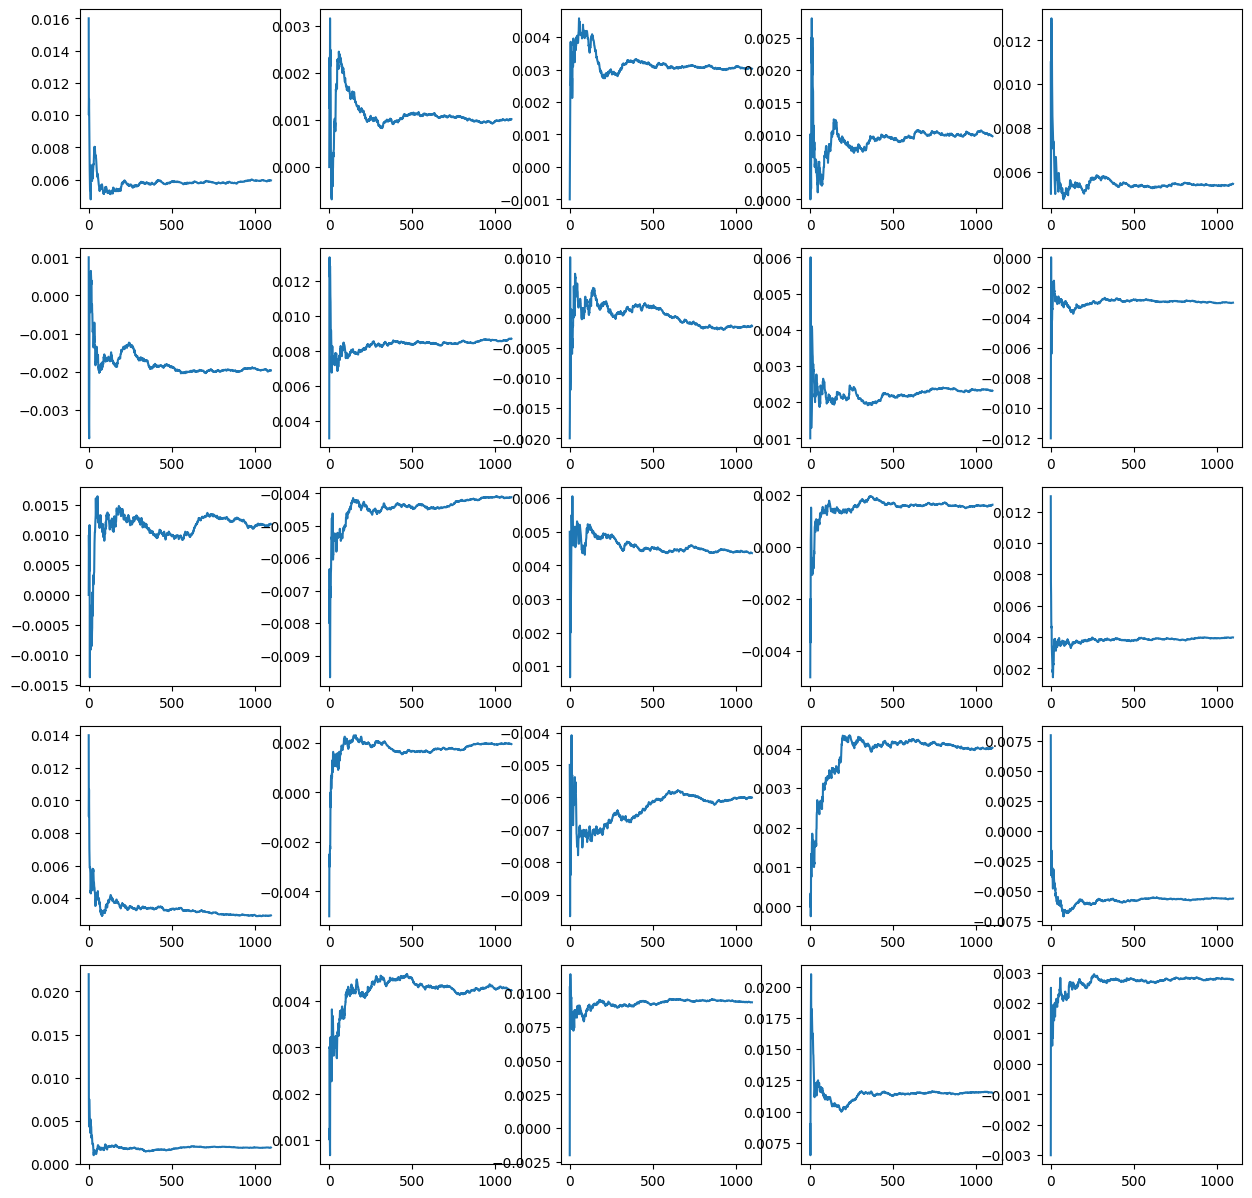

In [34]:
convergence_plots(dshap.marginals_g)

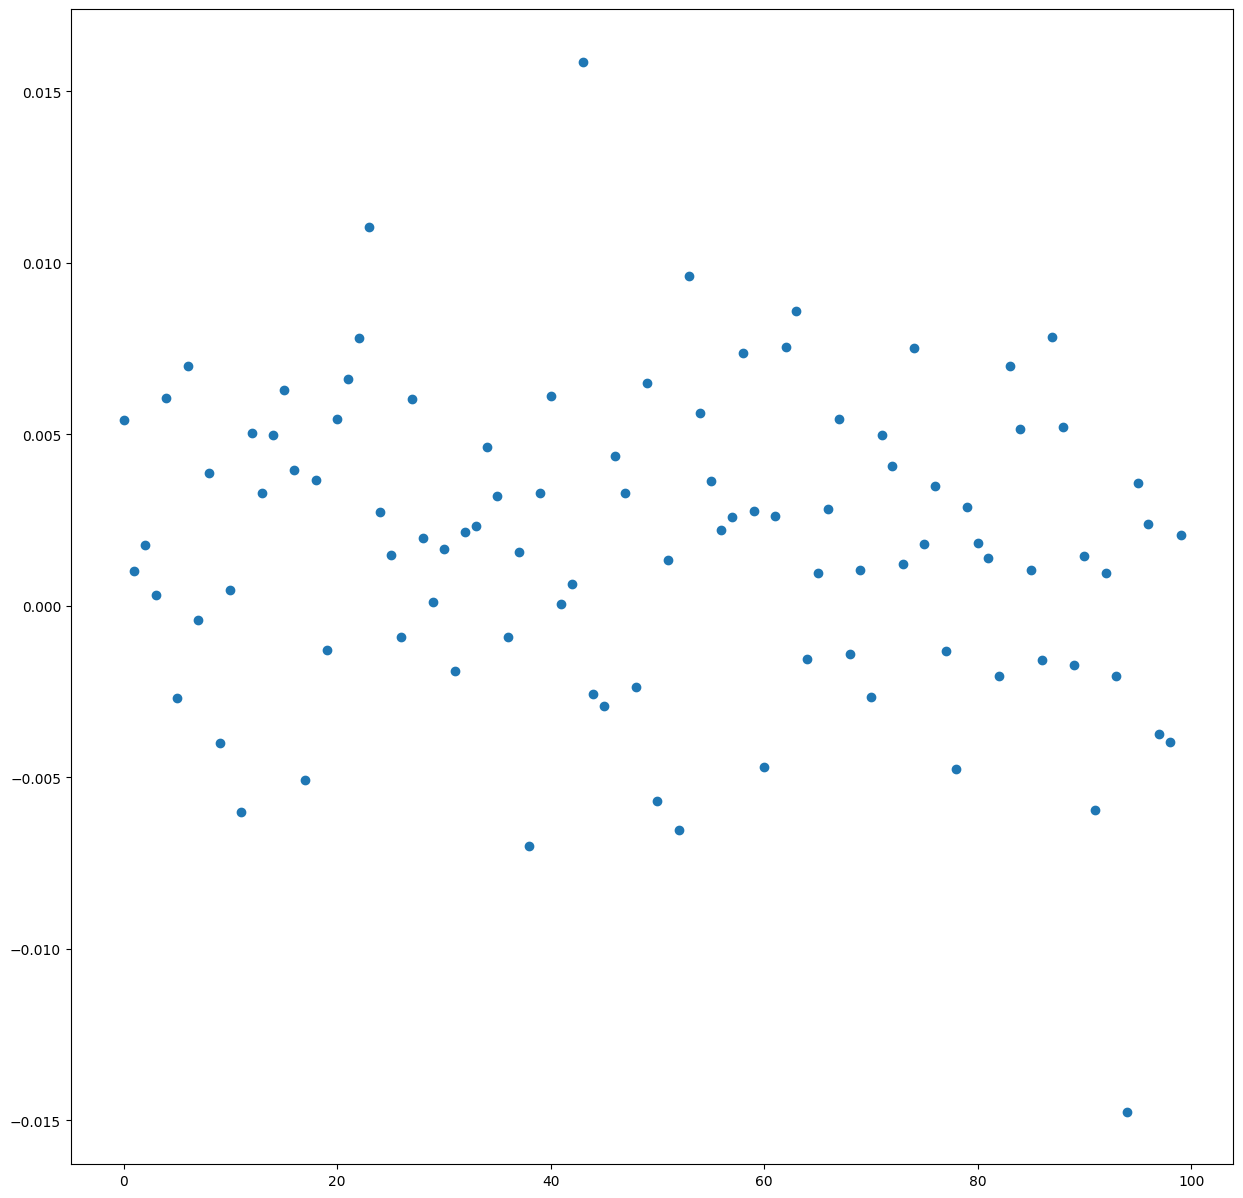

In [35]:
dshap.marginals_tmc.shape
plt.scatter(range(100),np.mean(dshap.marginals_tmc,0))

Now let's see the effect of removing high valuen points

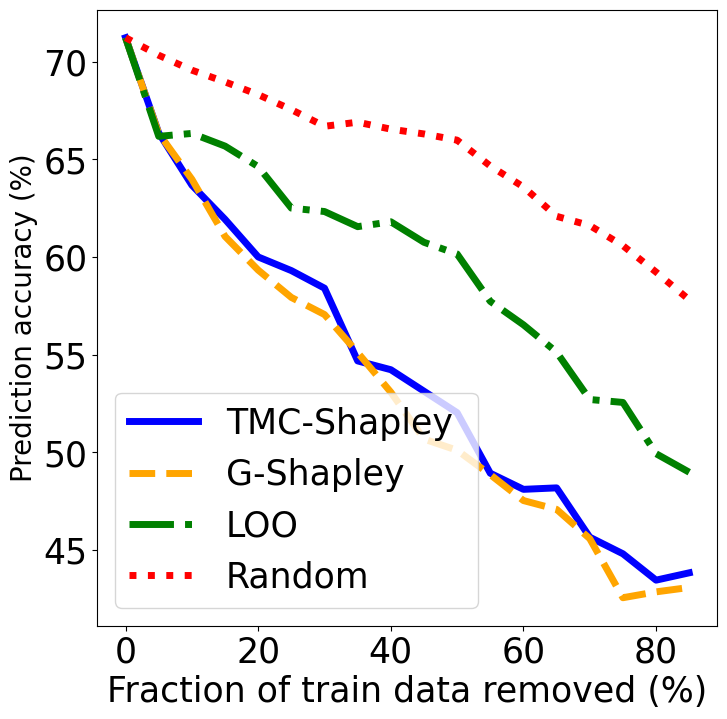

In [36]:
dshap.performance_plots([dshap.vals_tmc, dshap.vals_g, dshap.vals_loo], num_plot_markers=20,
                       sources=dshap.sources)

In [38]:
import numpy as np
from sklearn.linear_model import Lasso
from itertools import combinations
import random

class SparseShapleyValue:
    def __init__(self, X, y, model, sparsity_level=0.1, random_seed=42):
        """
        初始化稀疏Shapley计算
        Args:
            X: 输入特征矩阵 (n_samples, n_features)
            y: 标签向量 (n_samples,)
            model: 需要评估的模型
            sparsity_level: 稀疏度，表示LASSO回归中非零系数比例
            random_seed: 随机种子，确保实验的可重复性
        """
        self.X = X
        self.y = y
        self.model = model
        self.sparsity_level = sparsity_level
        self.random_seed = random_seed
        self.n_samples = X.shape[0]
        self.n_features = X.shape[1]

    def _train_model(self, X_subset, y_subset):
        """
        训练子集模型
        Args:
            X_subset: 特征子集
            y_subset: 标签子集
        Returns:
            训练后的模型
        """
        self.model.fit(X_subset, y_subset)
        return self.model

    def _lasso_solve(self, X_subset, y_subset):
        """
        使用LASSO回归进行稀疏优化
        Args:
            X_subset: 特征子集
            y_subset: 标签子集
        Returns:
            LASSO回归模型，带有稀疏解
        """
        lasso = Lasso(alpha=self.sparsity_level, random_state=self.random_seed)
        lasso.fit(X_subset, y_subset)
        return lasso

    def _evaluate_model(self, X_test, model):
        """
        使用模型评估测试数据
        Args:
            X_test: 测试数据
            model: 已训练的模型
        Returns:
            预测得分
        """
        return model.score(X_test, self.y)

    def calculate_sparse_shapley(self, iterations=100):
        """
        计算稀疏Shapley值
        Args:
            iterations: 迭代次数
        Returns:
            每个样本点的Shapley值
        """
        shapley_values = np.zeros(self.n_samples)
        random.seed(self.random_seed)
        
        for _ in range(iterations):
            sample_order = random.sample(range(self.n_samples), self.n_samples)
            marginal_contributions = np.zeros(self.n_samples)
            X_subset, y_subset = np.zeros((0, self.n_features)), np.zeros((0,))
            last_score = 0
            
            for i, idx in enumerate(sample_order):
                X_subset = np.vstack([X_subset, self.X[idx].reshape(1, -1)])
                y_subset = np.append(y_subset, self.y[idx])
                
                # 使用LASSO回归进行稀疏优化
                model = self._lasso_solve(X_subset, y_subset)
                current_score = self._evaluate_model(self.X, model)
                
                marginal_contributions[idx] = current_score - last_score
                last_score = current_score
            
            shapley_values += marginal_contributions
        
        # 平均所有迭代的Shapley值
        shapley_values /= iterations
        return shapley_values



# 生成示例数据
np.random.seed(42)
X, y = X_raw[:100], y_raw[:100]
X_test, y_test = X_raw[100:], y_raw[100:]

# 选择需要评估的模型
from sklearn.linear_model import LinearRegression
model = LogisticRegression()

# 实例化稀疏Shapley值计算器
sparse_shap_calculator = SparseShapleyValue(X, y, model, sparsity_level=0.1)

# 计算Shapley值
shapley_values = sparse_shap_calculator.calculate_sparse_shapley(iterations=100)

# 输出结果
print("Shapley values for each sample:")
print(shapley_values)


c:\Users\666\anaconda3\envs\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\Users\666\anaconda3\envs\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\Users\666\anaconda3\envs\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

Shapley values for each sample:
[ 1.73192479e-03  1.13790504e-02  1.03249848e-02  2.41914108e-03
  1.74165035e-02  8.72666754e-03  1.14167043e-02  7.75372117e-03
  2.25206534e-02 -1.37733595e-02 -2.79965606e-02  4.89808966e-05
  1.00399378e-02  1.60863815e-02  3.24076745e-02  2.69805538e-04
  2.04650179e-02 -2.40140448e-03  9.13774722e-03 -3.58151919e-03
 -2.15488861e-02  1.86759029e-02  1.86308542e-02  1.46737687e-02
 -1.07095473e-02  7.54734999e-03 -8.68870238e-03  1.39146996e-03
 -1.88872818e-03  1.10524446e-03  5.70845474e-03 -1.09487858e-03
 -2.99120160e-03  4.89116694e-03  2.77649879e-02 -2.17110413e-03
  1.93344738e-02  8.93714824e-04 -1.33681960e-02  2.64000679e-03
  6.84131345e-03  2.58067422e-03 -2.61973876e-02  6.27707054e-03
  2.86181635e-02 -1.60467602e-02  1.38852441e-02 -7.48443899e-03
 -3.35636516e-02  2.45518366e-02 -1.55754210e-03  1.29619602e-02
  5.91648392e-03 -1.45977284e-02  2.01223566e-02 -2.29815209e-03
  1.60863080e-02  1.36918065e-03  5.79833808e-04  1.065088

c:\Users\666\anaconda3\envs\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\Users\666\anaconda3\envs\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


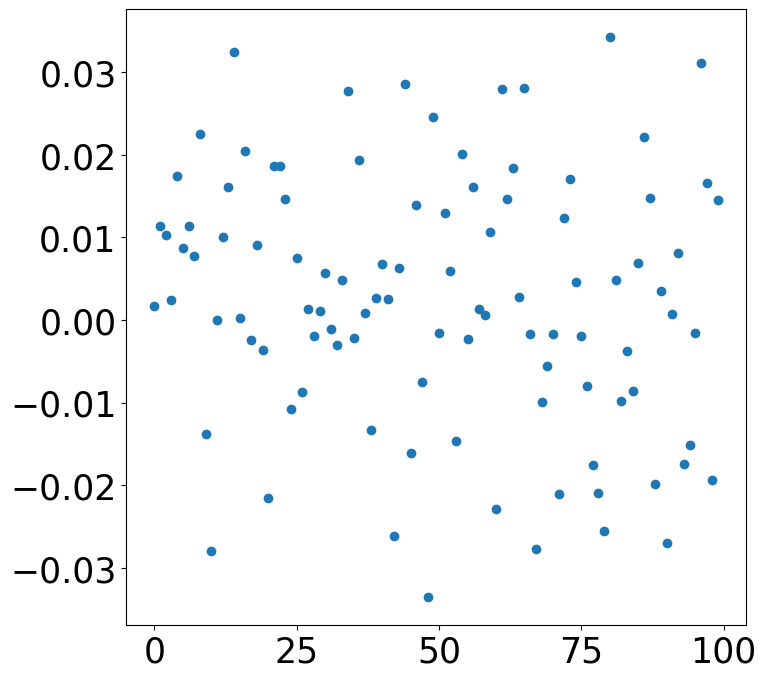

In [39]:
plt.scatter(range(100),shapley_values)


In [40]:
dshap.performance_plots([shapley_values, dshap.vals_g, dshap.vals_loo], num_plot_markers=20,
                       sources=dshap.sources)

SyntaxError: invalid syntax (3717137649.py, line 1)